# Learning outcomes
- Geometric transformation
    - rotation
    - translation
    - affine transformation
    - perspective transformation

- Some basic drawing functions
    - line
    - circle
    - ellipse
    - rectangle
    - text
    
- Bitwise operation
    - OR
    - XOR
    - AND
    - NOT
    
-  Convolution: sliding window performing linear combination.
    - Image smoothing (denoising)
    - Sharpening
    - at the heart of CNN
    - other effects

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

## Geometric transformation

### Translation

In [2]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1, 0, tx], [0, 1, ty]])

dst = cv.warpAffine(img, M, (w, h))

show_img(f"translation tx: {tx}, ty: {ty}", dst)

### Rotation

In [3]:
#define M: center, angle and scale
yc, xc = h // 2, w // 2

#positive: anticlockwise, negative:clockwise
angle = 45

M = cv.getRotationMatrix2D((xc, yc), angle, 1)
dst = cv.warpAffine(img, M, (w, h))

show_img("rotation", dst)

## Custom affine transform

<function matplotlib.pyplot.show(close=None, block=None)>

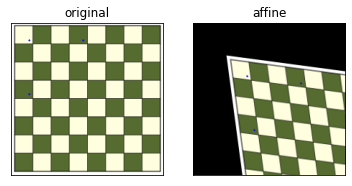

In [4]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

h, w = img.shape[:2]

p0 = np.float32([[25,25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img, M, (w, h))

plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine")
plt.show

In [5]:
dst[75, 75, :]

array([  0,   0, 255], dtype=uint8)

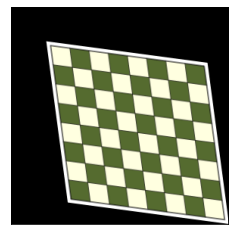

In [6]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

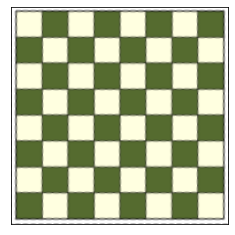

In [7]:
M_inv = cv.getAffineTransform(p1, p0)
ori_restored = cv.warpAffine(dst_new, M_inv, (w, h))

plt_img(ori_restored)

### Perspective transform

In [29]:
img = cv.imread("images/name_card_Sample.webp")

show_img("img", img, adjust=True)

In [30]:
#get the 4 points
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(77, 390)
(914, 275)
(118, 105)
(768, 47)


In [2]:
from scipy.spatial.distance import euclidean

In [31]:
img_copy = img.copy()

w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

W = max(w1, w2)
H = max(h1, h2)

p_arr = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv.warpPerspective(img_copy, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img_copy)
show_img("img", warp)

## Drawing functions

In [61]:
#line
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [62]:
img_copy = img.copy()

cv.line(img_copy, (30, 80), (150, 150), (0, 0, 255), 4, cv.LINE_AA)
show_img("line", img_copy)

In [63]:
#circle
img_copy = img.copy()

cv.circle(img_copy, (145, 50), 40, (0, 0, 255), 2, cv.LINE_AA)
show_img("circle", img_copy)

In [64]:
#ellipse
img_copy = img.copy()
axes = (25, 50)
angle = 90

cv.ellipse(img_copy, (145, 50), axes, angle, 0, 360, (100, 0, 100), 2, cv.LINE_AA)
show_img("ellipse", img_copy)

In [65]:
#half ellipse
img_copy = img.copy()
axes = (25, 50)
angle = 90

cv.ellipse(img_copy, (145, 50), axes, angle, 0, 180, (100, 0, 100), 2, cv.LINE_AA)
show_img("ellipse", img_copy)

In [66]:
#rectangle
img_copy = img.copy()

cv.rectangle(img_copy, (30, 80), (150, 150), (0, 0, 255), 4, cv.LINE_AA)
show_img("rectangle", img_copy)

In [67]:
#text
img_copy = img.copy()

cv.putText(img_copy, "I am a happy dog!", (15, 145), cv.FONT_HERSHEY_SIMPLEX, 0.65, (200, 0, 50), 2)
show_img("font", img_copy)

### create a custom drawing board
Trackbar function, mouse callback function

In [68]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, GREEN, BLUE, CYAN, MAGENTA, YELLOW, WHITE)

# create a trackbar function, mouse callback function, while loop to show template
def nothing(x):
    pass

p0 = p1 = (0, 0)

def mouse (event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos(tr1_name, wn)
        if d == 0:
            d = -1
        i = cv.getTrackbarPos(tr2_name, wn)
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow(wn, img)
        

wn = "window"
tr1_name = "thickness"
tr2_name = "color"
img = np.zeros((400, 400, 3), dtype=np.uint8)
cv.namedWindow(wn)
cv.createTrackbar(tr1_name, wn, 0, 10, nothing)
cv.createTrackbar(tr2_name, wn, 0, 6, nothing)
cv.setMouseCallback(wn, mouse)

while (1):
    cv.imshow(wn, img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
    if k == ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

## Exercise
Draw a bullseye image like what is shown below

In [69]:
gray = np.zeros((400, 400), dtype=np.uint8)

yc, xc = img.shape[0] // 2, img.shape[1] // 2
radius = np.arange(20, 200, 15)

for r in radius:
    cv.circle(img, (xc, yc), r, 255, 2)
    
cv.putText(img, "Bullseye", (20, 375), cv.FONT_HERSHEY_SIMPLEX, 0.65, 255, 2)

show_img("img", img)

## bitwise operation

In [70]:
rect = np.zeros((400, 400), np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rectangle", rect)
show_img("circle", circle)

In [71]:
#AND
res_AND = cv.bitwise_and(rect, circle)
show_img("AND", res_AND)

In [73]:
#OR
res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [74]:
#XOR
res_XOR = cv.bitwise_xor(rect, circle)
show_img("XOR", res_XOR)

In [75]:
#NOT
res_NOT = cv.bitwise_not(rect)
show_img("NOT", res_NOT)

In [77]:
#
img = cv.imread("images/dog.jfif")

h, w = img.shape[:2]

mask = np.zeros((h, w), dtype=np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

res = cv.bitwise_and(img, img, mask=mask)

show_img("res", res)

## Convolution

In [18]:
#identity kernel
img = cv.imread("images/opencv_logo.png")

kernel = np.zeros((3, 3))
kernel[1, 1] = 1
#print(kernel)

dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identity", dst)

In [19]:
#sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")

dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("sharpen", dst)

In [81]:
#blur
kernel = np.ones((5, 5)) / 25

blur = cv.filter2D(img, -1, kernel)

dst = cv.addWeighted(img, 1.6, blur, -0.6, 0)

show_img("unsharp masking", dst)

In [83]:
cv.GaussianBlur

<function GaussianBlur>

4 functions to perform image blurring:
- `cv.blur`: mean average filter
- `cv.GaussianBlur`: Gaussian filter, suitable for gaussian noise
- `cv.medianFilter`: median filter, useful to eliminate salt and pepper noise
- `cv.bilateralFilter`: edge-preserving filter

## Weekly Activity

### Question 1
Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
- Use external libraries imutils.
- Modify the transformation matrix.

In [4]:
img = cv.imread("images/lena.jfif")

In [6]:
#method 1: using external library
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25872 sha256=7d98165b96307818a0dfc85004030cbc945957e14e0e34b5ceaae8ff8a090765
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [3]:
#import the library
import imutils as imutils

In [23]:
#rotation angle: clockwise
angle = 45

#image rotation
img_rotate = imutils.rotate_bound(img, angle)

#display original and rotated images
show_img("original", img)
show_img("rotated", img_rotate)

#print image size
print("size of original image: ", (h, w))
print("size of rotated image: ", (new_H, new_W))

size of original image:  (225, 225)
size of rotated image:  (318, 318)


In [22]:
#method 2: modify transformation metrics

#get img size
h, w = img.shape[:2]

#calculate center of image
yc, xc = h // 2, w // 2

#rotation angle: anticlockwise
angle = -315

#compute rotation matrix
M = cv.getRotationMatrix2D((xc, yc), angle, 1)

#calculation of new bounding box dimensions
cos = M[0, 0]
sin = M[0, 1]
new_W = int((h * np.abs(sin)) + (w * np.abs(cos)))
new_H = int((h * cos) + (w * sin))

#djust rotation matrix
M[1, 2] += (new_H / 2) - yc
M[0, 2] += (new_W / 2) - xc

#rotate img according to adjusted rotation matrix
img_rotate = cv.warpAffine(img, M, (new_W, new_H))

#display img
show_img("original", img)
show_img("rotated", img_rotate)

#print image size
print("size of original image: ", (h, w))
print("size of rotated image: ", (new_H, new_W))

size of original image:  (225, 225)
size of rotated image:  (318, 318)


### Question 2
Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy.
The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use `cv.threshold` function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:
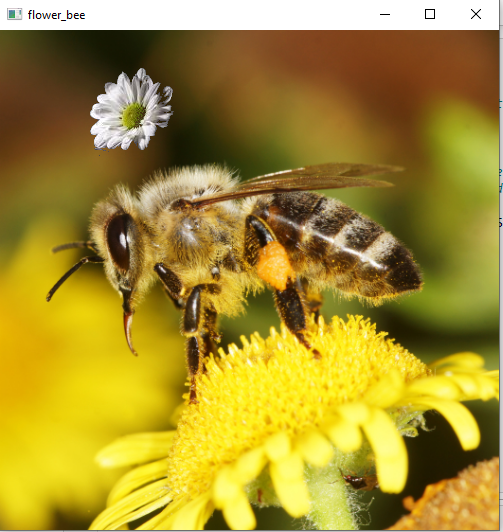

In [20]:
#load images
img1 = cv.imread("images/flower.jfif")
img2 = cv.imread("images/native-bee.png")

#check if images exist
assert img1 is not None, "Image of flower not found!"
assert img2 is not None, "Image of native-bee is not found!"

#create ROI
rows, cols, channels = img1.shape
ROI = img2[0:rows, 0:cols]

#flower mask
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img1_gray, 70, 255, cv.THRESH_BINARY)

#inverse flower mask
mask_inv = cv.bitwise_not(mask)

#black out area of flower in ROI
img2_bg = cv.bitwise_and(ROI, ROI, mask = mask_inv)

#take only region of flower from flower image
img1_flower = cv.bitwise_and(img1, img1, mask = mask)

#put flower in ROI
dst = cv.add(img2_bg, img1_flower)
img2[0:rows, 0:cols] = dst

#display image
show_img("res", img2)

### Question 3
Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':

$ 3 \times 3 kernel:$
$ \begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0\\ \end{bmatrix}$

$ 5 \times 5 kernel:$
$ \begin{bmatrix} -1 & -1 & -1 & -1 & -1 \\ -1 & -1 & -1 & -1 & -1 \\ -1 & -1 & 25 & -1 & -1 \\ -1 & -1 & -1 & -1 & -1 \\ -1 & -1 & -1 & -1 & -1 \\ \end{bmatrix}$

What can you infer from the outputs?

In [5]:
#load image
img = cv.imread("images/native-bee.png")

#sharpening kernel
kernel_3x3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_5x5 = np.array([[-1, -1, -1, -1, -1], 
                       [-1, -1, -1, -1, -1], 
                       [-1, -1, 25, -1, -1],
                       [-1, -1, -1, -1, -1], 
                       [-1, -1, -1, -1, -1]])

#apply sharpening kernel into image
dst_3x3 = cv.filter2D(img, -1, kernel_3x3)
dst_5x5 = cv.filter2D(img, -1, kernel_5x5)

#display images
show_img("original", img)
show_img("3x3Kernel", dst_3x3)
show_img("5x5Kernel", dst_5x5)

#### Inference:
The 5x5 kernel displays an image which is more sharpened than the 3x3 kernel.

### Question 4
Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

In [13]:
#load img
img = cv.imread("images/noise_lena.jpg")

#kernel size
kernel = (5, 5)

#image smoothing techniques
#average filter
img_blur = cv.blur(img, kernel)
#Gaussian kernel
img_Gaussian = cv.GaussianBlur(img, kernel, 0)
#median filter
img_median = cv.medianBlur(img, 5)

#display images
show_img("original", img)
#blur image
show_img("average filter", img_blur)
#clearer compared to average filter, maintains image details well 
show_img("Gaussian kernel", img_Gaussian)
#most clear compared to average filter and Gaussian kernel, salt and pepper noise are eliminated
show_img("median filter", img_median)